# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import scipy.stats as stats
%matplotlib inline

In [95]:
#Your code here

df_unclean = pd.read_csv('multipleChoiceResponses.csv',encoding='latin1')
df = pd.read_csv('multipleChoiceResponses_cleaned.csv',encoding='latin1')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,

In [96]:
df_unclean.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorTitle', 'JobFactorCompanyFunding', 'JobFactorImpact',
       'JobFactorRemote', 'JobFactorIndustry', 'JobFactorLeaderReputation',
       'JobFactorDiversity', 'JobFactorPublishingOpportunity', 'exchangeRate',
       'AdjustedCompensation'],
      dtype='object', length=230)

In [98]:
df.LearningCategorySelftTaught.head()

0     0.0
1    10.0
2    20.0
3    30.0
4    60.0
Name: LearningCategorySelftTaught, dtype: float64

In [99]:
df_unclean.describe()

,Age,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect
count,16385.000000,13109.000000,13126.000000,13111.000000,13122.000000,13126.000000,13094.000000,7530.000000,7528.000000,7517.000000,7529.000000,7523.000000,7513.000000
mean,32.372841,33.366771,27.375514,15.217593,16.988607,5.531434,1.795940,36.144754,21.268066,10.806372,13.869372,13.094776,2.396247
std,10.473487,25.787181,26.860840,18.996778,23.676917,11.072680,9.357886,21.649591,16.165958,12.257932,11.722945,12.974846,12.157137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,10.000000,0.000000,5.000000,5.000000,0.000000
50%,30.000000,30.000000,20.000000,10.000000,5.000000,0.000000,0.000000,35.000000,20.000000,10.000000,10.000000,10.000000,0.000000
75%,37.000000,50.000000,40.000000,25.000000,30.000000,10.000000,0.000000,50.000000,30.000000,15.000000,20.000000,20.000000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000


In [100]:
df_unclean.FormalEducation.unique()

array(["Bachelor's degree", "Master's degree", 'Doctoral degree', nan,
       "Some college/university study without earning a bachelor's degree",
       'I did not complete any formal education past high school',
       'Professional degree', 'I prefer not to answer'], dtype=object)

In [101]:
df_unclean.isna().sum()

GenderSelect                                  95
Country                                      121
Age                                          331
EmploymentStatus                               0
StudentStatus                              15436
LearningDataScience                        15432
CodeWriter                                  3530
CareerSwitcher                             13704
CurrentJobTitleSelect                       4886
TitleFit                                    5212
CurrentEmployerType                         5115
MLToolNextYearSelect                        5718
MLMethodNextYearSelect                      5883
LanguageRecommendationSelect                5718
PublicDatasetsSelect                        5920
LearningPlatformSelect                      5445
LearningPlatformUsefulnessArxiv            14325
LearningPlatformUsefulnessBlogs            11951
LearningPlatformUsefulnessCollege          13357
LearningPlatformUsefulnessCompany          15735
LearningPlatformUsef

In [102]:
df.isna().sum()

GenderSelect                                 105
Country                                     6635
Age                                         6844
EmploymentStatus                            6532
StudentStatus                              25088
LearningDataScience                        25074
CodeWriter                                 10042
CareerSwitcher                             23350
CurrentJobTitleSelect                      11400
TitleFit                                   11724
CurrentEmployerType                        11650
MLToolNextYearSelect                       12269
MLMethodNextYearSelect                     12434
LanguageRecommendationSelect               12269
PublicDatasetsSelect                       12471
LearningPlatformSelect                     11996
LearningPlatformUsefulnessArxiv            22072
LearningPlatformUsefulnessBlogs            19698
LearningPlatformUsefulnessCollege          21839
LearningPlatformUsefulnessCompany          23482
LearningPlatformUsef

In [103]:
df.StudentStatus.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: StudentStatus, dtype: object

In [104]:
count_row = df.shape[0]  # gives number of row count
count_col = df.shape[1]
count_row, count_col

(26394, 230)

In [105]:
df.FormalEducation.head()

0    Bachelor's degree
1      Master's degree
2      Master's degree
3      Master's degree
4      Doctoral degree
Name: FormalEducation, dtype: object

In [106]:
df.groupby('FormalEducation')['AdjustedCompensation'].mean()

FormalEducation
Bachelor's degree                                                    6.488710e+04
Doctoral degree                                                      2.956618e+07
I did not complete any formal education past high school             5.931777e+04
I prefer not to answer                                               2.228557e+05
Master's degree                                                      6.913990e+04
Professional degree                                                  6.120670e+04
Some college/university study without earning a bachelor's degree    8.291218e+04
Name: AdjustedCompensation, dtype: float64

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

### Null Hypothesis
h_0 = The level of ones degree does not effect there total compensation

### Alternative Hypothesis
h_1 = Students with master's degrees earn more then students with bachelors degrees


In [107]:
#Your code here
compensation_bachelor = df[(df.FormalEducation == "Bachelor's degree") & (~df.AdjustedCompensation.isnull())]['AdjustedCompensation']
compensation_masters = df[(df.FormalEducation == "Master's degree") & (~df.AdjustedCompensation.isnull())]['AdjustedCompensation']

In [111]:
compensation_bachelor.describe()

count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: AdjustedCompensation, dtype: float64

In [112]:
len(compensation_bachelor)

1107

In [113]:
mean_bachelor = compensation_bachelor.mean()
std_bachelor = compensation_bachelor.std()

In [114]:
mean_bachelor, std_bachelor

(64887.097994618794, 306935.8723879783)

In [115]:
compensation_masters.head()

3     250000.000
14     36634.400
27     53352.000
31     35419.104
37     80000.000
Name: AdjustedCompensation, dtype: float64

In [116]:
len(compensation_masters)

1990

In [117]:
mean_master = compensation_masters.mean()
std_master = compensation_masters.std()
mean_master, std_master

(69139.8998712, 135527.2085045828)

In [118]:
import flatiron_stats as fs

In [119]:
p = fs.p_value_welch_ttest(compensation_bachelor,compensation_masters)
p

0.33077639451272445

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


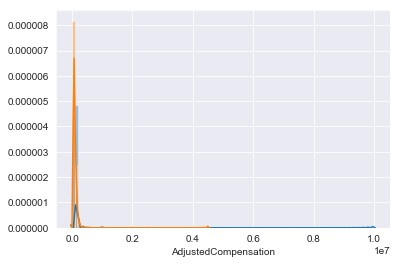

In [120]:
sns.distplot(compensation_bachelor)
sns.distplot(compensation_masters)

In [123]:
p_scypi = stats.ttest_ind(compensation_bachelor, compensation_masters, equal_var=False)[1]/2
p_scypi

0.33077639451272445

In [138]:
print("For Master's Degree and Bachelor Degree Graduates we have the folling stats")
print("Mean Compensation: \t\tMaster's = {}\tBachelor's = {}".format(mean_master, mean_bachelor))
print("Number of salaries declared: \tMaster's = {} \tBachelor's = {}".format(len(compensation_masters), len(compensation_bachelor)))
print("P_value for test: \t\tP-value = {}".format(p))
print("Given the P-value, there is not enough evidence to reject the null hypothesis \nThere is no significant difference in salary for those with Bachelor's or Master's Degrees")







For Master's Degree and Bachelor Degree Graduates we have the folling stats
Mean Compensation: 		Master's = 69139.8998712	Bachelor's = 64887.097994618794
Number of salaries declared: 	Master's = 1990 	Bachelor's = 1107
P_value for test: 		P-value = 0.33077639451272445
Given the P-value, there is not enough evidence to reject the null hypothesis 
There is no significant difference in salary for those with Bachelor's or Master's Degrees


### Exploring the Skweness of the Data

In [139]:
from scipy.stats import kurtosis, skew

In [141]:
print("Skweness: \tMaster's={} \tBachelor's={}".format(skew(compensation_masters), skew(compensation_bachelor)))
print("Kurtosis: \tMaster's={} \tBachelor's={}".format(kurtosis(compensation_masters), kurtosis(compensation_bachelor)))

Skweness: 	Master's=22.200238903998045 	Bachelor's=30.740157922957756
Kurtosis: 	Master's=645.3442866761054 	Bachelor's=990.6021758984344


#### NOTE
Given the skweness and Kurtosis values of both master and bachelor's degree populations, the effect of outliers is strongly felt in both these populations. As such we have to try and eliminate some of the noise

In [242]:
type(compensation_bachelor)

pandas.core.series.Series

In [243]:
sum(compensation_bachelor > (mean_bachelor+1*std_bachelor))

6

In [244]:
max(compensation_bachelor)

9999999.0

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


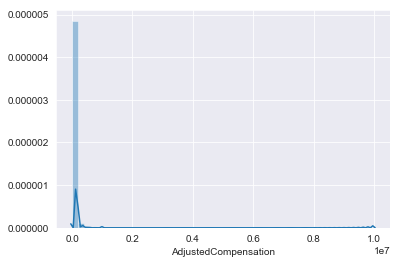

In [245]:
sns.distplot(compensation_bachelor);

### Parsing out the outliers to reduce influence on test

In [246]:
q_b = []
for q in np.linspace(0.8, 1, num=50):
    q_1 =  round(compensation_bachelor.quantile(q=q), 2)
    q_b.append((q,q_1))
    
len(q_b)
q_b[-10:]

[(0.963265306122449, 180000.0),
 (0.9673469387755103, 189428.57),
 (0.9714285714285714, 197000.0),
 (0.9755102040816327, 200000.0),
 (0.9795918367346939, 200000.0),
 (0.9836734693877551, 217004.43),
 (0.9877551020408164, 238306.52),
 (0.9918367346938776, 319428.57),
 (0.9959183673469387, 434000.0),
 (1.0, 9999999.0)]

In [247]:
print('We can set a threshold for compensation values at 500000. This will allow us to capture a sufficient portion of the data while removing the last quarter of the quentile that is altering the data')

We can set a threshold for compensation values at 500000. This will allow us to capture a sufficient portion of the data while removing the last quarter of the quentile that is altering the data


In [248]:
q_m = []
for q in np.linspace(0.8, 1, num=50):
    q_1 =  round(compensation_bachelor.quantile(q=q), 2)
    q_m.append((q,q_1))
    
len(q_m)
q_m[-10:]

[(0.963265306122449, 180000.0),
 (0.9673469387755103, 189428.57),
 (0.9714285714285714, 197000.0),
 (0.9755102040816327, 200000.0),
 (0.9795918367346939, 200000.0),
 (0.9836734693877551, 217004.43),
 (0.9877551020408164, 238306.52),
 (0.9918367346938776, 319428.57),
 (0.9959183673469387, 434000.0),
 (1.0, 9999999.0)]

In [249]:
comp_bachelor_parsed = compensation_bachelor[compensation_bachelor<500000]
comp_master_parsed = compensation_masters[compensation_masters<500000]

In [250]:
print(len(comp_bachelor_parsed))
print(len(comp_master_parsed))

1103
1984


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


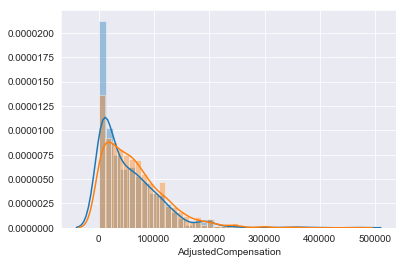

In [251]:
sns.distplot(comp_bachelor_parsed)
sns.distplot(comp_master_parsed)

In [252]:
p_parsed = fs.p_value_welch_ttest(comp_bachelor_parsed,comp_master_parsed)
p_parsed

6.694760973369185e-07

In [253]:
mean_master_parse = comp_master_parsed.mean()
mean_bachelor_parse = comp_bachelor_parsed.mean()

In [254]:
print("For Master's Degree and Bachelor Degree Graduates we have the folling stats")
print("Mean Compensation: \t\tMaster's = {}\tBachelor's = {}".format(mean_master_parse, mean_bachelor_parse))
print("Number of salaries declared: \tMaster's = {} \tBachelor's = {}".format(len(comp_master_parsed), len(comp_bachelor_parsed)))
print("P_value for test: \t\tP-value = {}".format(p_parsed))






For Master's Degree and Bachelor Degree Graduates we have the folling stats
Mean Compensation: 		Master's = 63756.8629756492	Bachelor's = 53744.35038988486
Number of salaries declared: 	Master's = 1984 	Bachelor's = 1103
P_value for test: 		P-value = 6.694760973369185e-07


Given the new results, if we were to eliminate salaries above 500K, the results of the test change drastically, under this new scenario, the test gives enough evidence to reject the null hypothesis

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

### Checking the data as is

In [232]:
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
compensation_bachelor = df[(df.FormalEducation == "Bachelor's degree") & (~df.AdjustedCompensation.isnull())]['AdjustedCompensation']
compensation_doctoral = df[(df.FormalEducation == "Doctoral degree") & (~df.AdjustedCompensation.isnull())]['AdjustedCompensation']

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


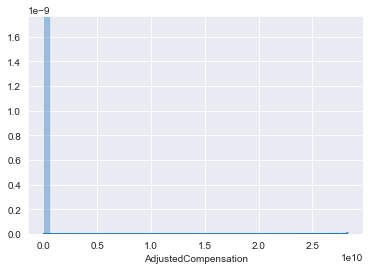

In [258]:
sns.distplot(compensation_doctoral)

In [264]:
compensation_doctoral.median()

74131.91999999997

In [265]:
len(compensation_doctoral)

967

In [268]:
q_d = []
for q in np.linspace(0.8, 1, num=100):
    q_1 =  round(compensation_doctoral.quantile(q=q), 2)
    q_d.append((q,q_1))
    
len(q_d)
q_d[-10:]

[(0.9818181818181818, 298975.48),
 (0.9838383838383838, 300000.0),
 (0.9858585858585859, 300000.0),
 (0.9878787878787879, 305000.0),
 (0.9898989898989898, 334848.48),
 (0.9919191919191919, 350000.0),
 (0.9939393939393939, 350000.0),
 (0.9959595959595959, 400000.0),
 (0.997979797979798, 11084848.48),
 (1.0, 28297400000.0)]

In [270]:
comp_doctoral_parse = compensation_doctoral[compensation_doctoral<500000]
len(comp_doctoral_parse)

964

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


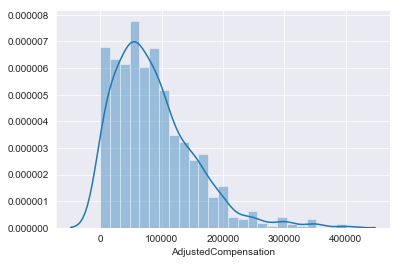

In [271]:
sns.distplot(comp_doctoral_parse)

In [272]:
comp_doctoral_parse.mean()

86194.98163085165

In [276]:
p_scypi_no_adj = stats.ttest_ind(compensation_doctoral, compensation_bachelor, equal_var=False)[1]/2
p_scypi_adj = stats.ttest_ind(comp_doctoral_parse, comp_bachelor_parsed, equal_var=False)[1]/2

In [277]:
#Your code here
print("Before checking and fixing for outliers we had the following results")
print("For Doctoral Degree and Bachelor Degree Graduates we have the folling stats")
print("Mean Compensation: \t\tDoctoral = {}\tBachelor's = {}".format(compensation_doctoral.mean(), compensation_bachelor.mean()))
print("Number of salaries declared: \tDoctoral = {} \tBachelor's = {}".format(len(compensation_doctoral), len(compensation_bachelor)))
print("P_value for test: \t\tP-value = {}\t\t\t".format(p_scypi_no_adj))

print("After adjusting the dataset for outliers")
print("For Doctoral Degree and Bachelor Degree Graduates we have the folling stats")
print("Mean Compensation: \t\tDoctoral = {}\tBachelor's = {}".format(comp_doctoral_parse.mean(), comp_bachelor_parsed.mean()))
print("Number of salaries declared: \tDoctoral = {} \tBachelor's = {}".format(len(comp_doctoral_parse), len(comp_bachelor_parsed)))
print("P_value for test: \t\tP-value = {}\t\t\t".format(p_scypi_adj))


Before checking and fixing for outliers we had the following results
For Doctoral Degree and Bachelor Degree Graduates we have the folling stats
Mean Compensation: 		Doctoral = 29566175.762453098	Bachelor's = 64887.097994618794
Number of salaries declared: 	Doctoral = 967 	Bachelor's = 1107
P_value for test: 		P-value = 0.15682381994720257			
After adjusting the dataset for outliers
For Doctoral Degree and Bachelor Degree Graduates we have the folling stats
Mean Compensation: 		Doctoral = 86194.98163085165	Bachelor's = 53744.35038988486
Number of salaries declared: 	Doctoral = 964 	Bachelor's = 1103
P_value for test: 		P-value = 8.193706502315271e-33			


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [278]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [289]:
#Your code here
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [292]:
ADJ = df[df['AdjustedCompensation'] <= 500000]
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, ADJ).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!